# DATA LOADING

In [1]:
import pandas as pd
import os
DATA_PATH='C:/Users/Adrish Bir/Desktop/Data science &Machine Learning/Flu/Flu'
csv_name='training_set_features.csv'
def load_data(data_path= DATA_PATH):
    csv_path = os.path.join(data_path,csv_name)
    return pd.read_csv(csv_path)

In [2]:
fludata = load_data()
fludata.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [3]:
fludata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
respondent_id                  26707 non-null int64
h1n1_concern                   26615 non-null float64
h1n1_knowledge                 26591 non-null float64
behavioral_antiviral_meds      26636 non-null float64
behavioral_avoidance           26499 non-null float64
behavioral_face_mask           26688 non-null float64
behavioral_wash_hands          26665 non-null float64
behavioral_large_gatherings    26620 non-null float64
behavioral_outside_home        26625 non-null float64
behavioral_touch_face          26579 non-null float64
doctor_recc_h1n1               24547 non-null float64
doctor_recc_seasonal           24547 non-null float64
chronic_med_condition          25736 non-null float64
child_under_6_months           25887 non-null float64
health_worker                  25903 non-null float64
health_insurance               14433 non-null float64
opinion_h1n1_vacc_effective  

In [3]:
bin_patient_attribs = ['behavioral_antiviral_meds','behavioral_avoidance','behavioral_face_mask',
                       'behavioral_wash_hands','behavioral_large_gatherings','behavioral_outside_home',
                       'behavioral_touch_face','child_under_6_months','health_worker','health_insurance','chronic_med_condition']
ordinal_h1n1_attribs = ['h1n1_concern','h1n1_knowledge','opinion_h1n1_vacc_effective',
                  'opinion_h1n1_risk','opinion_h1n1_sick_from_vacc']
ordinal_seas_attribs = ['opinion_seas_vacc_effective',
                  'opinion_seas_risk','opinion_seas_sick_from_vacc'] 
categorical_attribs = ['age_group','education','race','sex','income_poverty',
                       'marital_status','rent_or_own','employment_status',
                       'hhs_geo_region','census_msa','employment_industry',
                       'employment_occupation']

len(bin_patient_attribs)+len(ordinal_h1n1_attribs)+len(ordinal_seas_attribs)+len(categorical_attribs)

31

In [4]:
fludata['education'].value_counts()

College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: education, dtype: int64

# Data viz

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x05BB3A70>,
      dtype=object)

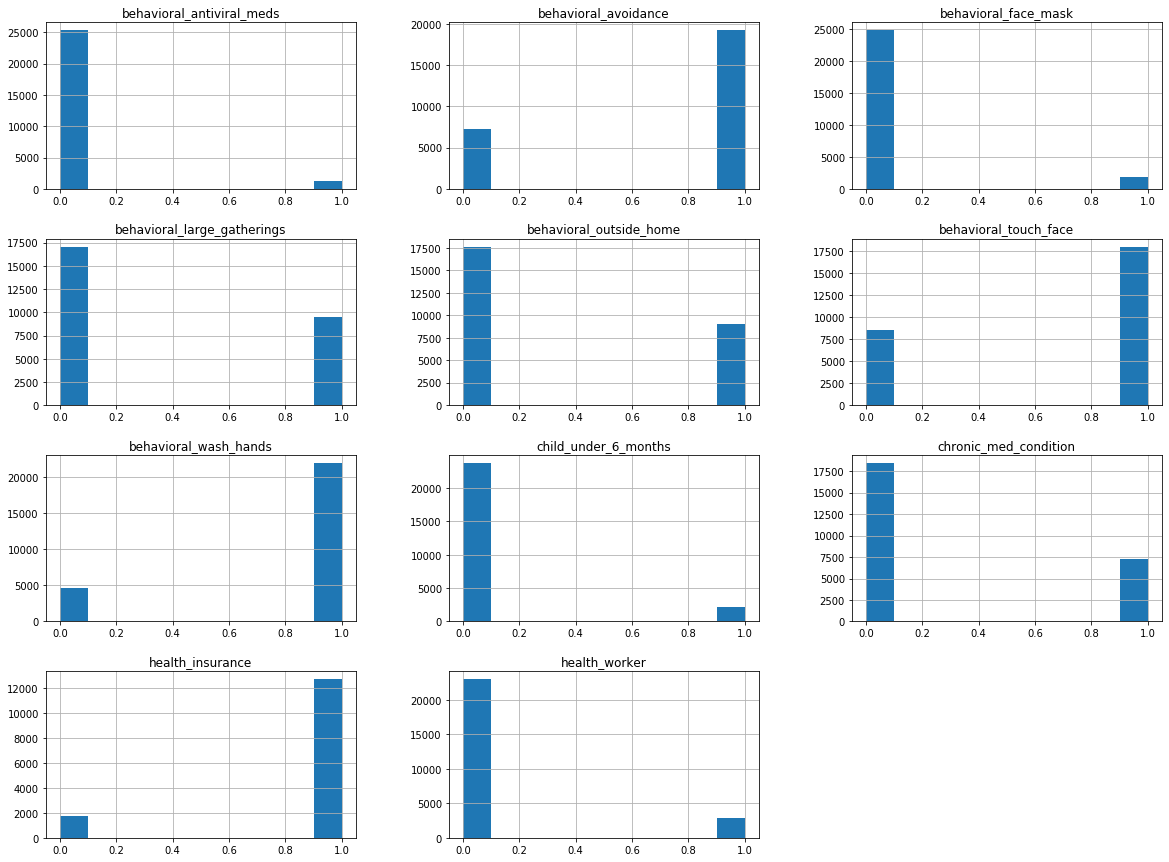

In [6]:
import matplotlib.pyplot as plt
fludata[bin_patient_attribs].hist(figsize=(20,15))

In [3]:
#plot similar histograms only on healthcare workers
#hwdata=fludata.loc[fludata['health_worker'] == 1.0]
#hwdata[bin_patient_attribs].hist(figsize=(20,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126E36B0>,
      dtype=object)

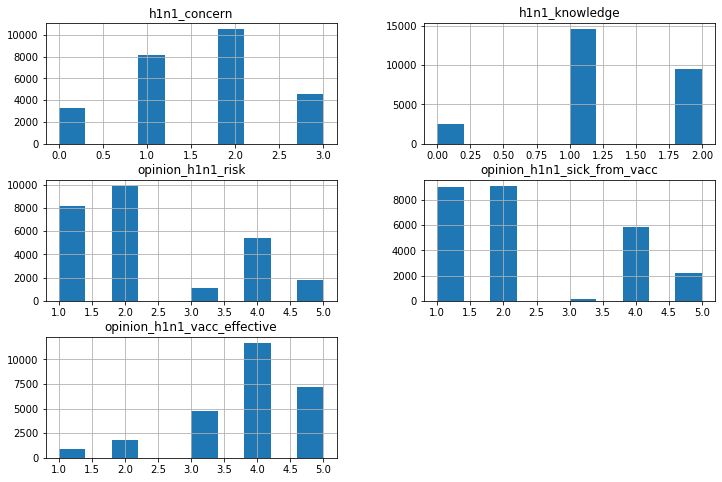

In [29]:
fludata[ordinal_h1n1_attribs].hist(figsize=(12,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12BC6910>,
      dtype=object)

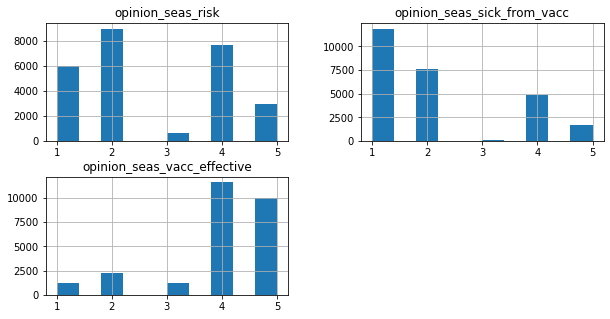

In [28]:
fludata[ordinal_seas_attribs].hist(figsize=(10,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x147346F0>,
      dtype=object)

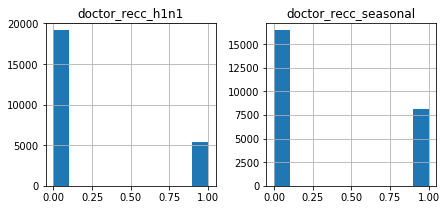

In [45]:
fludata[['doctor_recc_h1n1','doctor_recc_seasonal']].hist(figsize=(7,3))

In [6]:
fludata.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

# load labels

In [5]:
#load labels
DATA_PATH='C:/Users/Adrish Bir/Desktop/Data science &Machine Learning/Flu/Flu'
csv_name='training_set_labels.csv'
def load_labels(data_path=DATA_PATH):
    csv_path = os.path.join(data_path,csv_name)
    return pd.read_csv(csv_path)

In [6]:
labels = load_labels()
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
respondent_id       26707 non-null int64
h1n1_vaccine        26707 non-null int64
seasonal_vaccine    26707 non-null int64
dtypes: int64(3)
memory usage: 626.0 KB


In [7]:
fludata1 = pd.merge(left=fludata, left_index=True,right=labels, right_index=True,
                  how='inner')

# stratified sampling

In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

income_poverty = imputer.fit_transform(fludata1[['income_poverty']])
fludata1['income_poverty'] = income_poverty

print(fludata1['income_poverty'].isnull().sum())
imputer.statistics_


0


array(['<= $75,000, Above Poverty'], dtype=object)

In [13]:
#from sklearn.model_selection import StratifiedShuffleSplit

#split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=52)
#for train_index,test_index in split.split(fludata1,fludata1['income_poverty']):
    #strat_train_set = fludata.loc[train_index]
    #strat_test_set = fludata.loc[test_index]

In [14]:
#print(split)

StratifiedShuffleSplit(n_splits=1, random_state=52, test_size=0.2,
            train_size=None)


In [17]:
#strat_test_set['income_poverty'].value_counts()/len(strat_test_set)

<= $75,000, Above Poverty    0.474167
> $75,000                    0.254961
Below Poverty                0.101086
Name: income_poverty, dtype: float64

In [18]:
#fludata1['income_poverty'].value_counts()/len(fludata1)

<= $75,000, Above Poverty    0.644026
> $75,000                    0.254989
Below Poverty                0.100985
Name: income_poverty, dtype: float64

# Imputation

In [8]:
fludata1.isnull().sum()

respondent_id_x                    0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [9]:
fludata1.shape

(26707, 39)

Will predict health insurance(binary classification), employment industry and employment occupation(multiclass classification)

In [33]:
fludata_imp = fludata1.drop(['health_insurance','employment_industry','employment_occupation'],axis=1)
fludata_imp.shape

(26707, 36)

In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'most_frequent')
fludata_imp_np = imputer.fit_transform(fludata_imp)
fludata_imp_df = pd.DataFrame(data = fludata_imp_np,columns = fludata_imp.columns )
fludata_imp_df.shape

(26707, 36)

In [35]:
fludata_imp_df.drop(['respondent_id_x','respondent_id_y'],axis=1,inplace=True)
fludata_imp_df.shape

(26707, 34)

In [49]:
i = 0
while i<34:
    b = fludata_imp_df.columns[i]
    a = str(len(fludata_imp_df[b].value_counts()))
    print(b + ' : '+ a)
    i += 1


h1n1_concern : 4
h1n1_knowledge : 3
behavioral_antiviral_meds : 2
behavioral_avoidance : 2
behavioral_face_mask : 2
behavioral_wash_hands : 2
behavioral_large_gatherings : 2
behavioral_outside_home : 2
behavioral_touch_face : 2
doctor_recc_h1n1 : 2
doctor_recc_seasonal : 2
chronic_med_condition : 2
child_under_6_months : 2
health_worker : 2
opinion_h1n1_vacc_effective : 5
opinion_h1n1_risk : 5
opinion_h1n1_sick_from_vacc : 5
opinion_seas_vacc_effective : 5
opinion_seas_risk : 5
opinion_seas_sick_from_vacc : 5
age_group : 5
education : 4
race : 4
sex : 2
income_poverty : 3
marital_status : 2
rent_or_own : 2
employment_status : 3
hhs_geo_region : 10
census_msa : 3
household_adults : 4
household_children : 4
h1n1_vaccine : 2
seasonal_vaccine : 2


In [36]:
categorical_attribs = ['age_group','education','race','sex','income_poverty',
                       'marital_status','rent_or_own','employment_status',
                       'hhs_geo_region','census_msa','household_adults','household_children']

oe_fludata = fludata_imp_df[categorical_attribs]
fludata_imp_df.drop(categorical_attribs,axis=1,inplace=True)
oe_fludata.shape

(26707, 12)

In [37]:

from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
oe_fludata_np = oe.fit_transform(oe_fludata)
oe.categories_

[array(['18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years',
        '65+ Years'], dtype=object),
 array(['12 Years', '< 12 Years', 'College Graduate', 'Some College'],
       dtype=object),
 array(['Black', 'Hispanic', 'Other or Multiple', 'White'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['<= $75,000, Above Poverty', '> $75,000', 'Below Poverty'],
       dtype=object),
 array(['Married', 'Not Married'], dtype=object),
 array(['Own', 'Rent'], dtype=object),
 array(['Employed', 'Not in Labor Force', 'Unemployed'], dtype=object),
 array(['atmpeygn', 'bhuqouqj', 'dqpwygqj', 'fpwskwrf', 'kbazzjca',
        'lrircsnp', 'lzgpxyit', 'mlyzmhmf', 'oxchjgsf', 'qufhixun'],
       dtype=object),
 array(['MSA, Not Principle  City', 'MSA, Principle City', 'Non-MSA'],
       dtype=object),
 array([0.0, 1.0, 2.0, 3.0], dtype=object),
 array([0.0, 1.0, 2.0, 3.0], dtype=object)]

In [38]:
oe_fludata_df = pd.DataFrame(data = oe_fludata_np,columns = oe_fludata.columns )
fludata_imp_df1 = pd.merge(left=fludata_imp_df, left_index=True,right=oe_fludata_df, right_index=True,
                  how='inner')
fludata_imp_df1.shape

(26707, 34)

In [39]:
fludata_imp_df1 = fludata_imp_df1.apply(pd.to_numeric, errors='ignore')
fludata_imp_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
h1n1_concern                   26707 non-null float64
h1n1_knowledge                 26707 non-null float64
behavioral_antiviral_meds      26707 non-null float64
behavioral_avoidance           26707 non-null float64
behavioral_face_mask           26707 non-null float64
behavioral_wash_hands          26707 non-null float64
behavioral_large_gatherings    26707 non-null float64
behavioral_outside_home        26707 non-null float64
behavioral_touch_face          26707 non-null float64
doctor_recc_h1n1               26707 non-null float64
doctor_recc_seasonal           26707 non-null float64
chronic_med_condition          26707 non-null float64
child_under_6_months           26707 non-null float64
health_worker                  26707 non-null float64
opinion_h1n1_vacc_effective    26707 non-null float64
opinion_h1n1_risk              26707 non-null float64
opinion_h1n1_sick_from_vacc

predicting Missing values in columns

In [49]:
target_col = fludata1[['health_insurance','employment_industry','employment_occupation']]
target_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
health_insurance         14433 non-null float64
employment_industry      13377 non-null object
employment_occupation    13237 non-null object
dtypes: float64(1), object(2)
memory usage: 626.0+ KB


In [59]:
flu_HI = pd.merge(left=fludata_imp_df1, left_index=True,right=target_col[['health_insurance']], right_index=True,
                  how='inner')
flu_HI.shape

(26707, 35)

Splitting it in train and test Set

Health Insurance

In [61]:
train = flu_HI[flu_HI['health_insurance'].notnull()]
test = flu_HI[flu_HI['health_insurance'].isnull()]
print(train.shape)
print(test.shape)

(14433, 35)
(12274, 35)


In [92]:
X_train = train.iloc[:,:34]
X_test = test.iloc[:,:34]
y_train = train.iloc[:,34:]
y_test = test.iloc[:,34:]

In [78]:
from sklearn.ensemble import RandomForestClassifier
Rf_clf = RandomForestClassifier(random_state=45)
Rf_clf.fit(X_train,y_train)
y_pred = Rf_clf.predict(X_test)
type(y_train)

F:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


numpy.ndarray

In [96]:
y_train = y_train.values.reshape(-1)

In [99]:
import numpy as np
y_fin = np.concatenate((y_train,y_pred))
len(y_fin)

26707

In [106]:
target_col['health_insurance_fin'] = y_fin
target_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 4 columns):
health_insurance         14433 non-null float64
employment_industry      13377 non-null object
employment_occupation    13237 non-null object
health_insurance_fin     26707 non-null float64
dtypes: float64(2), object(2)
memory usage: 834.7+ KB


F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


employment industry

In [126]:
flu_EI = pd.merge(left=fludata_imp_df1, left_index=True,right=target_col[['employment_industry']], right_index=True,
                  how='inner')
flu_EI.shape

(26707, 35)

In [127]:
train = flu_EI[flu_EI['employment_industry'].notnull()]
test = flu_EI[flu_EI['employment_industry'].isnull()]
print(train.shape)
print(test.shape)

(13377, 35)
(13330, 35)


In [128]:
train_np = oe.fit_transform(train)
train = pd.DataFrame(data = train_np,columns = flu_EI.columns )
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13377 entries, 0 to 13376
Data columns (total 35 columns):
h1n1_concern                   13377 non-null float64
h1n1_knowledge                 13377 non-null float64
behavioral_antiviral_meds      13377 non-null float64
behavioral_avoidance           13377 non-null float64
behavioral_face_mask           13377 non-null float64
behavioral_wash_hands          13377 non-null float64
behavioral_large_gatherings    13377 non-null float64
behavioral_outside_home        13377 non-null float64
behavioral_touch_face          13377 non-null float64
doctor_recc_h1n1               13377 non-null float64
doctor_recc_seasonal           13377 non-null float64
chronic_med_condition          13377 non-null float64
child_under_6_months           13377 non-null float64
health_worker                  13377 non-null float64
opinion_h1n1_vacc_effective    13377 non-null float64
opinion_h1n1_risk              13377 non-null float64
opinion_h1n1_sick_from_vacc

In [129]:
X_train = train.iloc[:,:34]
X_test = test.iloc[:,:34]
y_train = train.iloc[:,34:]
y_test = test.iloc[:,34:]

In [130]:
from sklearn.ensemble import RandomForestClassifier
Rf_clf = RandomForestClassifier(random_state=45)
Rf_clf.fit(X_train,y_train)
y_pred = Rf_clf.predict(X_test)
type(y_train)

F:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


pandas.core.frame.DataFrame

In [131]:
y_train = y_train.values.reshape(-1)

In [132]:
import numpy as np
y_fin = np.concatenate((y_train,y_pred))
len(y_fin)

26707

In [133]:
target_col['employment_industry_fin'] = y_fin
target_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 5 columns):
health_insurance           14433 non-null float64
employment_industry        13377 non-null object
employment_occupation      13237 non-null object
health_insurance_fin       26707 non-null float64
employment_industry_fin    26707 non-null float64
dtypes: float64(3), object(2)
memory usage: 1.0+ MB


F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


employment_occupation

In [134]:
flu_EO = pd.merge(left=fludata_imp_df1, left_index=True,right=target_col[['employment_occupation']], right_index=True,
                  how='inner')
flu_EO.shape

(26707, 35)

In [135]:
train = flu_EO[flu_EO['employment_occupation'].notnull()]
test = flu_EO[flu_EO['employment_occupation'].isnull()]
print(train.shape)
print(test.shape)

(13237, 35)
(13470, 35)


In [136]:
train_np = oe.fit_transform(train)
train = pd.DataFrame(data = train_np,columns = flu_EO.columns)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13237 entries, 0 to 13236
Data columns (total 35 columns):
h1n1_concern                   13237 non-null float64
h1n1_knowledge                 13237 non-null float64
behavioral_antiviral_meds      13237 non-null float64
behavioral_avoidance           13237 non-null float64
behavioral_face_mask           13237 non-null float64
behavioral_wash_hands          13237 non-null float64
behavioral_large_gatherings    13237 non-null float64
behavioral_outside_home        13237 non-null float64
behavioral_touch_face          13237 non-null float64
doctor_recc_h1n1               13237 non-null float64
doctor_recc_seasonal           13237 non-null float64
chronic_med_condition          13237 non-null float64
child_under_6_months           13237 non-null float64
health_worker                  13237 non-null float64
opinion_h1n1_vacc_effective    13237 non-null float64
opinion_h1n1_risk              13237 non-null float64
opinion_h1n1_sick_from_vacc

In [137]:
X_train = train.iloc[:,:34]
X_test = test.iloc[:,:34]
y_train = train.iloc[:,34:]
y_test = test.iloc[:,34:]

In [138]:
from sklearn.ensemble import RandomForestClassifier
Rf_clf = RandomForestClassifier(random_state=45)
Rf_clf.fit(X_train,y_train)
y_pred = Rf_clf.predict(X_test)
type(y_train)

F:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


pandas.core.frame.DataFrame

In [139]:
y_train = y_train.values.reshape(-1)

In [140]:
import numpy as np
y_fin = np.concatenate((y_train,y_pred))
len(y_fin)

26707

In [141]:
target_col['employment_occupation_fin'] = y_fin
target_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 6 columns):
health_insurance             14433 non-null float64
employment_industry          13377 non-null object
employment_occupation        13237 non-null object
health_insurance_fin         26707 non-null float64
employment_industry_fin      26707 non-null float64
employment_occupation_fin    26707 non-null float64
dtypes: float64(4), object(2)
memory usage: 1.2+ MB


F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [145]:
target_col.drop(['employment_occupation','employment_industry','health_insurance'],axis=1,inplace=True)

F:\Anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [147]:
target_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
health_insurance_fin         26707 non-null float64
employment_industry_fin      26707 non-null float64
employment_occupation_fin    26707 non-null float64
dtypes: float64(3)
memory usage: 626.0 KB


Preparing Final data

In [148]:
flu_final = pd.merge(left=fludata_imp_df1, left_index=True,right=target_col, right_index=True,
                  how='inner')
flu_final.shape

(26707, 37)

In [149]:
flu_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 37 columns):
h1n1_concern                   26707 non-null float64
h1n1_knowledge                 26707 non-null float64
behavioral_antiviral_meds      26707 non-null float64
behavioral_avoidance           26707 non-null float64
behavioral_face_mask           26707 non-null float64
behavioral_wash_hands          26707 non-null float64
behavioral_large_gatherings    26707 non-null float64
behavioral_outside_home        26707 non-null float64
behavioral_touch_face          26707 non-null float64
doctor_recc_h1n1               26707 non-null float64
doctor_recc_seasonal           26707 non-null float64
chronic_med_condition          26707 non-null float64
child_under_6_months           26707 non-null float64
health_worker                  26707 non-null float64
opinion_h1n1_vacc_effective    26707 non-null float64
opinion_h1n1_risk              26707 non-null float64
opinion_h1n1_sick_from_vacc

In [151]:
flu_final.to_csv(r'C:\Users\Adrish Bir\Desktop\Data science &Machine Learning\Flu\Flu\fludata_final.csv',index=False,header=True)

In [3]:
import pandas as pd
fludata = pd.read_csv(r'C:\Users\Adrish Bir\Desktop\Data science &Machine Learning\Flu\Flu\fludata_final.csv')
print(fludata.shape)
#fludata.head()

(26707, 37)


In [4]:
fludata = fludata.astype('int64')
#fludata.info()

# Train test split

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

In [5]:
X = fludata.drop(['h1n1_vaccine','seasonal_vaccine'],axis=1)
y = fludata[['h1n1_vaccine','seasonal_vaccine']]
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

(26707, 35)
(26707, 2)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


Using Binary Relevance and gaussian NB

In [28]:
from sklearn.metrics import roc_auc_score
clf = BinaryRelevance(GaussianNB())

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=48)

clf.fit(X_train,y_train)
y_scores = clf.predict_proba(X_test)
y_scores = y_scores.toarray()
roc_auc_score(y_test,y_scores)

0.7954588700881643

In [29]:
y_scores

array([[3.78200346e-03, 4.22726684e-02],
       [9.99455748e-01, 9.99929760e-01],
       [4.27081065e-04, 1.04856469e-02],
       ...,
       [8.03197089e-01, 9.53311138e-01],
       [7.27042217e-03, 2.64038416e-02],
       [2.37674271e-02, 1.56698587e-01]])

Using binary relevance and Random_forest_classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
clf_forest = BinaryRelevance(RandomForestClassifier())
clf_forest.fit(X_train,y_train)
y_scores = clf_forest.predict_proba(X_test)
y_scores = y_scores.toarray()
roc_auc_score(y_test,y_scores)

F:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7997887808284196

using classifier chain and Gaussian NB

In [32]:
from skmultilearn.problem_transform import ClassifierChain

clf = ClassifierChain(GaussianNB())
clf.fit(X_train,y_train)
y_scores = clf.predict_proba(X_test)
y_scores = y_scores.toarray()

roc_auc_score(y_test,y_scores)


0.7897451290695032

using classifier chain and Random forest classifier

In [33]:
clf_forest = ClassifierChain(RandomForestClassifier())
clf_forest.fit(X_train,y_train)
y_scores = clf_forest.predict_proba(X_test)
y_scores = y_scores.toarray()
roc_auc_score(y_test,y_scores)

F:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7952581037415032

labelPowerset and GaussianNB

In [34]:
from skmultilearn.problem_transform import LabelPowerset
clf = LabelPowerset(GaussianNB())
clf.fit(X_train,y_train)
y_scores = clf.predict_proba(X_test)
y_scores = y_scores.toarray()

roc_auc_score(y_test,y_scores)

0.7983542466050617

labelPowerSet and Randomforestclassifier

In [35]:
clf_forest = LabelPowerset(RandomForestClassifier())
clf_forest.fit(X_train,y_train)
y_scores = clf_forest.predict_proba(X_test)
y_scores = y_scores.toarray()
roc_auc_score(y_test,y_scores)

F:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8018041223961436

MultiLabel KNN

In [49]:
from skmultilearn.adapt import MLkNN
clf_mlknn = MLkNN(k=30)
X_train1 = X_train.values
y_train1 = y_train.values
clf_mlknn.fit(X_train1,y_train1)
y_scores = clf_mlknn.predict_proba(X_test)
y_scores = y_scores.toarray()
roc_auc_score(y_test,y_scores)

0.6702701552479515

Support Vector Classifier

with Label Powerset

!

In [56]:
from sklearn.svm import SVC
clf_svc = LabelPowerset(SVC(probability=True))
clf_svc.fit(X_train,y_train)
y_scores = clf_svc.predict_proba(X_test)
y_scores = y_scores.toarray()
roc_auc_score(y_test,y_scores)

F:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8284628821689164

Random forest classifier upgrade

In [55]:
from sklearn.ensemble import RandomForestClassifier
from skmultilearn.problem_transform import LabelPowerset

# construct base forest classifier
base_classifier = RandomForestClassifier()

# setup problem transformation approach with sparse matrices for random forest
clf_forest = LabelPowerset(classifier=base_classifier,
    require_dense=[False, False])
# train
clf_forest.fit(X_train, y_train)

# predict
y_scores = clf_forest.predict_proba(X_test)
y_scores = y_scores.toarray()
roc_auc_score(y_test,y_scores)

F:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8011863636432308

Grid Searching for hyperparameters in SVC

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=48)
X_train_subset = X_train.iloc[0:400,:].values
y_train_subset = y_train.iloc[0:400,:].values
y_train_subset.shape

(400, 2)

In [13]:
from skmultilearn.problem_transform import LabelPowerset
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {'C':[0.1,1,10,10,1000],
             'gamma': [1,0.1,0.01,0.001,0.0001],
             'kernel':['rbf']}
grid = GridSearchCV(SVC(probability=True),param_grid,refit=True,verbose=3)
clf_svc = LabelPowerset(grid)
clf_svc.fit(X_train_subset,y_train_subset)
print(grid.best_params_)
print(grid.best_estimator_)

F:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.478, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.478, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.477, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.478, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.478, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.477, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.478, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.478, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.477, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.493, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.493, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.523, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.507, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    3.2s finished
F:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [16]:
from sklearn.metrics import roc_auc_score
y_scores = clf_svc.predict_proba(X_test)
y_scores = y_scores.toarray()
roc_auc_score(y_test,y_scores)

0.80987163398395

# Final Training of Data on whole dataset

In [17]:
clf_svc_final = LabelPowerset(grid.best_estimator_)
clf_svc_final.fit(X,y)


LabelPowerset(classifier=SVC(C=1000, cache_size=200, class_weight=None,
                             coef0=0.0, decision_function_shape='ovr', degree=3,
                             gamma=0.0001, kernel='rbf', max_iter=-1,
                             probability=True, random_state=None,
                             shrinking=True, tol=0.001, verbose=False),
              require_dense=[True, True])

In [18]:
import joblib
joblib.dump(clf_svc_final,'Fludata_model.pkl')


['Fludata_model.pkl']

In [19]:
#Fludata_model = joblib.load('Fludata_model.pkl')

# loading and preparing test data 

In [1]:
import pandas as pd
import os
DATA_PATH='C:/Users/Adrish Bir/Desktop/Data science &Machine Learning/Flu/Flu'
csv_name='test_set_features.csv'
def load_data(data_path= DATA_PATH):
    csv_path = os.path.join(data_path,csv_name)
    return pd.read_csv(csv_path)
test_data = load_data()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
respondent_id                  26708 non-null int64
h1n1_concern                   26623 non-null float64
h1n1_knowledge                 26586 non-null float64
behavioral_antiviral_meds      26629 non-null float64
behavioral_avoidance           26495 non-null float64
behavioral_face_mask           26689 non-null float64
behavioral_wash_hands          26668 non-null float64
behavioral_large_gatherings    26636 non-null float64
behavioral_outside_home        26626 non-null float64
behavioral_touch_face          26580 non-null float64
doctor_recc_h1n1               24548 non-null float64
doctor_recc_seasonal           24548 non-null float64
chronic_med_condition          25776 non-null float64
child_under_6_months           25895 non-null float64
health_worker                  25919 non-null float64
health_insurance               14480 non-null float64
opinion_h1n1_vacc_effective  

In [2]:
test_data.isnull().sum()

respondent_id                      0
h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

In [3]:
print(test_data.shape)
test_data1 = test_data.drop(['health_insurance','employment_industry','employment_occupation'],axis=1)
print(test_data1.shape)

(26708, 36)
(26708, 33)


In [4]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'most_frequent')
test_data1_imp_np = imputer.fit_transform(test_data1)
test_data1_imp_df = pd.DataFrame(data = test_data1_imp_np,columns = test_data1.columns )
test_data1_imp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 33 columns):
respondent_id                  26708 non-null object
h1n1_concern                   26708 non-null object
h1n1_knowledge                 26708 non-null object
behavioral_antiviral_meds      26708 non-null object
behavioral_avoidance           26708 non-null object
behavioral_face_mask           26708 non-null object
behavioral_wash_hands          26708 non-null object
behavioral_large_gatherings    26708 non-null object
behavioral_outside_home        26708 non-null object
behavioral_touch_face          26708 non-null object
doctor_recc_h1n1               26708 non-null object
doctor_recc_seasonal           26708 non-null object
chronic_med_condition          26708 non-null object
child_under_6_months           26708 non-null object
health_worker                  26708 non-null object
opinion_h1n1_vacc_effective    26708 non-null object
opinion_h1n1_risk              26708 non-nu

In [5]:
categorical_attribs = ['age_group','education','race','sex','income_poverty',
                       'marital_status','rent_or_own','employment_status',
                       'hhs_geo_region','census_msa','household_adults','household_children']

oe_test_data = test_data1_imp_df[categorical_attribs]
test_data1_imp_df.drop(categorical_attribs,axis=1,inplace=True)
oe_test_data.shape

(26708, 12)

In [6]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
oe_test_data_np = oe.fit_transform(oe_test_data)
oe.categories_

[array(['18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years',
        '65+ Years'], dtype=object),
 array(['12 Years', '< 12 Years', 'College Graduate', 'Some College'],
       dtype=object),
 array(['Black', 'Hispanic', 'Other or Multiple', 'White'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['<= $75,000, Above Poverty', '> $75,000', 'Below Poverty'],
       dtype=object),
 array(['Married', 'Not Married'], dtype=object),
 array(['Own', 'Rent'], dtype=object),
 array(['Employed', 'Not in Labor Force', 'Unemployed'], dtype=object),
 array(['atmpeygn', 'bhuqouqj', 'dqpwygqj', 'fpwskwrf', 'kbazzjca',
        'lrircsnp', 'lzgpxyit', 'mlyzmhmf', 'oxchjgsf', 'qufhixun'],
       dtype=object),
 array(['MSA, Not Principle  City', 'MSA, Principle City', 'Non-MSA'],
       dtype=object),
 array([0.0, 1.0, 2.0, 3.0], dtype=object),
 array([0.0, 1.0, 2.0, 3.0], dtype=object)]

In [7]:
oe_test_data_df = pd.DataFrame(data = oe_test_data_np,columns = oe_test_data.columns )
test_data_imp_df1 = pd.merge(left=test_data1_imp_df, left_index=True,right=oe_test_data_df, right_index=True,
                  how='inner')
test_data_imp_df1.shape

(26708, 33)

In [8]:
test_data_imp_df1 = test_data_imp_df1.apply(pd.to_numeric, errors='ignore')
test_data_imp_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 33 columns):
respondent_id                  26708 non-null int64
h1n1_concern                   26708 non-null float64
h1n1_knowledge                 26708 non-null float64
behavioral_antiviral_meds      26708 non-null float64
behavioral_avoidance           26708 non-null float64
behavioral_face_mask           26708 non-null float64
behavioral_wash_hands          26708 non-null float64
behavioral_large_gatherings    26708 non-null float64
behavioral_outside_home        26708 non-null float64
behavioral_touch_face          26708 non-null float64
doctor_recc_h1n1               26708 non-null float64
doctor_recc_seasonal           26708 non-null float64
chronic_med_condition          26708 non-null float64
child_under_6_months           26708 non-null float64
health_worker                  26708 non-null float64
opinion_h1n1_vacc_effective    26708 non-null float64
opinion_h1n1_risk            

In [9]:
test_data_imp_df1.drop(['respondent_id'],axis=1,inplace=True)

In [10]:
target_col = test_data[['health_insurance','employment_industry','employment_occupation']]
target_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 3 columns):
health_insurance         14480 non-null float64
employment_industry      13433 non-null object
employment_occupation    13282 non-null object
dtypes: float64(1), object(2)
memory usage: 626.0+ KB


In [11]:
test_HI = pd.merge(left=test_data_imp_df1, left_index=True,right=target_col[['health_insurance']], right_index=True,
                  how='inner')
test_HI.shape

(26708, 33)

missing value prediction

In [12]:
train = test_HI[test_HI['health_insurance'].notnull()]
test = test_HI[test_HI['health_insurance'].isnull()]
print(train.shape)
print(test.shape)

(14480, 33)
(12228, 33)


In [13]:
X_train = train.iloc[:,:32]
X_test = test.iloc[:,:32]
y_train = train.iloc[:,32:]
y_test = test.iloc[:,32:]

In [14]:
from sklearn.ensemble import RandomForestClassifier
Rf_clf = RandomForestClassifier(random_state=45)
Rf_clf.fit(X_train,y_train)
y_pred = Rf_clf.predict(X_test)
type(y_train)

F:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


pandas.core.frame.DataFrame

In [15]:
y_train = y_train.values.reshape(-1)
import numpy as np
y_fin = np.concatenate((y_train,y_pred))
target_col['health_insurance_fin'] = y_fin
target_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 4 columns):
health_insurance         14480 non-null float64
employment_industry      13433 non-null object
employment_occupation    13282 non-null object
health_insurance_fin     26708 non-null float64
dtypes: float64(2), object(2)
memory usage: 834.7+ KB


F:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [16]:
test_EI = pd.merge(left=test_data_imp_df1, left_index=True,right=target_col[['employment_industry']], right_index=True,
                  how='inner')
test_EI.shape

(26708, 33)

In [17]:
train = test_EI[test_EI['employment_industry'].notnull()]
test = test_EI[test_EI['employment_industry'].isnull()]
print(train.shape)
print(test.shape)

(13433, 33)
(13275, 33)


In [18]:
train_np = oe.fit_transform(train)
train = pd.DataFrame(data = train_np,columns = test_EI.columns)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13433 entries, 0 to 13432
Data columns (total 33 columns):
h1n1_concern                   13433 non-null float64
h1n1_knowledge                 13433 non-null float64
behavioral_antiviral_meds      13433 non-null float64
behavioral_avoidance           13433 non-null float64
behavioral_face_mask           13433 non-null float64
behavioral_wash_hands          13433 non-null float64
behavioral_large_gatherings    13433 non-null float64
behavioral_outside_home        13433 non-null float64
behavioral_touch_face          13433 non-null float64
doctor_recc_h1n1               13433 non-null float64
doctor_recc_seasonal           13433 non-null float64
chronic_med_condition          13433 non-null float64
child_under_6_months           13433 non-null float64
health_worker                  13433 non-null float64
opinion_h1n1_vacc_effective    13433 non-null float64
opinion_h1n1_risk              13433 non-null float64
opinion_h1n1_sick_from_vacc

In [19]:
X_train = train.iloc[:,:32]
X_test = test.iloc[:,:32]
y_train = train.iloc[:,32:]
y_test = test.iloc[:,32:]

In [20]:
from sklearn.ensemble import RandomForestClassifier
Rf_clf = RandomForestClassifier(random_state=45)
Rf_clf.fit(X_train,y_train)
y_pred = Rf_clf.predict(X_test)
type(y_train)

F:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


pandas.core.frame.DataFrame

In [21]:
y_train = y_train.values.reshape(-1)
import numpy as np
y_fin = np.concatenate((y_train,y_pred))
target_col['employment_industry_fin'] = y_fin
target_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 5 columns):
health_insurance           14480 non-null float64
employment_industry        13433 non-null object
employment_occupation      13282 non-null object
health_insurance_fin       26708 non-null float64
employment_industry_fin    26708 non-null float64
dtypes: float64(3), object(2)
memory usage: 1.0+ MB


F:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [22]:
test_EO = pd.merge(left=test_data_imp_df1, left_index=True,right=target_col[['employment_occupation']], right_index=True,
                  how='inner')
test_EO.shape

(26708, 33)

In [23]:
train = test_EO[test_EO['employment_occupation'].notnull()]
test = test_EO[test_EO['employment_occupation'].isnull()]
print(train.shape)
print(test.shape)

(13282, 33)
(13426, 33)


In [24]:
train_np = oe.fit_transform(train)
train = pd.DataFrame(data = train_np,columns = test_EO.columns)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13282 entries, 0 to 13281
Data columns (total 33 columns):
h1n1_concern                   13282 non-null float64
h1n1_knowledge                 13282 non-null float64
behavioral_antiviral_meds      13282 non-null float64
behavioral_avoidance           13282 non-null float64
behavioral_face_mask           13282 non-null float64
behavioral_wash_hands          13282 non-null float64
behavioral_large_gatherings    13282 non-null float64
behavioral_outside_home        13282 non-null float64
behavioral_touch_face          13282 non-null float64
doctor_recc_h1n1               13282 non-null float64
doctor_recc_seasonal           13282 non-null float64
chronic_med_condition          13282 non-null float64
child_under_6_months           13282 non-null float64
health_worker                  13282 non-null float64
opinion_h1n1_vacc_effective    13282 non-null float64
opinion_h1n1_risk              13282 non-null float64
opinion_h1n1_sick_from_vacc

In [25]:
X_train = train.iloc[:,:32]
X_test = test.iloc[:,:32]
y_train = train.iloc[:,32:]
y_test = test.iloc[:,32:]

In [26]:
from sklearn.ensemble import RandomForestClassifier
Rf_clf = RandomForestClassifier(random_state=45)
Rf_clf.fit(X_train,y_train)
y_pred = Rf_clf.predict(X_test)
type(y_train)

F:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


pandas.core.frame.DataFrame

In [27]:
y_train = y_train.values.reshape(-1)
import numpy as np
y_fin = np.concatenate((y_train,y_pred))
target_col['employment_occupation_fin'] = y_fin
target_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 6 columns):
health_insurance             14480 non-null float64
employment_industry          13433 non-null object
employment_occupation        13282 non-null object
health_insurance_fin         26708 non-null float64
employment_industry_fin      26708 non-null float64
employment_occupation_fin    26708 non-null float64
dtypes: float64(4), object(2)
memory usage: 1.2+ MB


F:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [28]:
target_col.drop(['employment_occupation','employment_industry','health_insurance'],axis=1,inplace=True)

F:\Anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [29]:
target_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 3 columns):
health_insurance_fin         26708 non-null float64
employment_industry_fin      26708 non-null float64
employment_occupation_fin    26708 non-null float64
dtypes: float64(3)
memory usage: 626.0 KB


In [30]:
test_final = pd.merge(left=test_data_imp_df1, left_index=True,right=target_col, right_index=True,
                  how='inner')
test_final.shape

(26708, 35)

In [34]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 35 columns):
h1n1_concern                   26708 non-null int64
h1n1_knowledge                 26708 non-null int64
behavioral_antiviral_meds      26708 non-null int64
behavioral_avoidance           26708 non-null int64
behavioral_face_mask           26708 non-null int64
behavioral_wash_hands          26708 non-null int64
behavioral_large_gatherings    26708 non-null int64
behavioral_outside_home        26708 non-null int64
behavioral_touch_face          26708 non-null int64
doctor_recc_h1n1               26708 non-null int64
doctor_recc_seasonal           26708 non-null int64
chronic_med_condition          26708 non-null int64
child_under_6_months           26708 non-null int64
health_worker                  26708 non-null int64
opinion_h1n1_vacc_effective    26708 non-null int64
opinion_h1n1_risk              26708 non-null int64
opinion_h1n1_sick_from_vacc    26708 non-null int64
opinion

In [32]:
test_final.to_csv(r'C:\Users\Adrish Bir\Desktop\Data science &Machine Learning\Flu\Flu\test_final.csv',index=False,header=True)

In [33]:
test_final = test_final.astype('int64')

# Final prediction

In [36]:
import joblib
Fludata_model = joblib.load('Fludata_model.pkl')

In [38]:
y_scores = Fludata_model.predict_proba(test_final)
type(y_scores)

scipy.sparse.lil.lil_matrix

In [40]:
y_scores = y_scores.toarray()
y_scores_df = pd.DataFrame(data = y_scores,columns =['h1n1_vaccine','seasonal_vaccine'] )

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [41]:
y_scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 2 columns):
h1n1_vaccine        26708 non-null float64
seasonal_vaccine    26708 non-null float64
dtypes: float64(2)
memory usage: 417.4 KB


In [44]:
prediction = pd.merge(left= test_data[['respondent_id']], left_index=True,right=y_scores_df, right_index=True,
                  how='inner')
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 3 columns):
respondent_id       26708 non-null int64
h1n1_vaccine        26708 non-null float64
seasonal_vaccine    26708 non-null float64
dtypes: float64(2), int64(1)
memory usage: 626.0 KB


In [45]:
prediction.to_csv(r'C:\Users\Adrish Bir\Desktop\Data science &Machine Learning\Flu\Flu\prediction.csv',index=False,header=True)

########## THE END ###########